In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('/content/gdrive/My Drive/JL-ML_colab_code')

from models.load_premade import load_premade_model

In [4]:
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255

print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
input_shape = x_train.shape[1:]
latent_dim = 2

model = load_premade_model(model_type = "autoencoder", model_name = "dense", 
                           input_shape=input_shape, 
                           latent_dim=latent_dim)

defaultdict(<class 'dict'>, {'autoencoder': {'dense': <function autoencoder_dense at 0x7fae57126ef0>, 'mnist_cnn_deep': <function autoencoder_mnist_cnn_deep at 0x7fae4205e200>, 'mnist_cnn_shallow': <function autoencoder_mnist_cnn_shallow at 0x7fae571267a0>}, 'variational_autoencoder': {'mnist_dense': <function variational_autoencoder_dense at 0x7fae42062170>, 'mnist_cnn_deep': <function variational_autoencoder_mnist_cnn_deep at 0x7fae42062050>, 'mnist_cnn_shallow': <function variational_autoencoder_mnist_cnn_shallow at 0x7fae420620e0>}})


In [6]:
output = model(x_test)

In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy)

epochs = 10
batch_size = 32
history = model.fit(x_train, x_train, validation_data=(x_test, x_test), 
                    epochs=epochs, batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2292 - val_loss: 0.2091
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2052 - val_loss: 0.2012
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1996 - val_loss: 0.1981
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1959 - val_loss: 0.1944
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1932 - val_loss: 0.1922
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1911 - val_loss: 0.1906
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1896 - val_loss: 0.1896
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1884 - val_loss: 0.1884
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1874 - val_loss: 0.1879
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.186

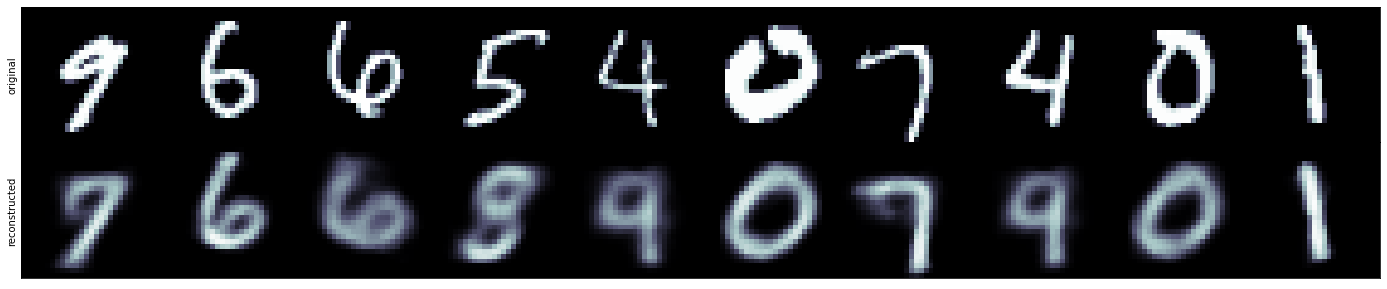

In [8]:
from plot_utils import plot_mnist_comparison, plot_2d_scatter

original = x_test[20:30, :, :, :]
decoded = model(original)

plot_mnist_comparison((original, decoded), figsize=(28, 5), row_labels=['original', 'reconstructed'])

tf.Tensor(
[[ -5.2414684   68.52307   ]
 [ -0.59506065   0.6268203 ]
 [ 45.8081      22.355425  ]
 ...
 [  4.14973     23.006777  ]
 [  4.680036    -1.7685832 ]
 [-13.157306     6.177159  ]], shape=(10000, 2), dtype=float32)


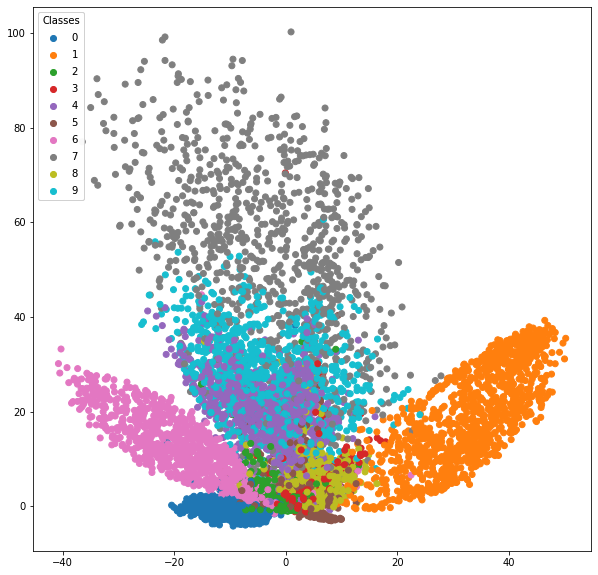

<class 'NoneType'>


In [9]:
import matplotlib.pyplot as plt
encoded = model.encode(x_test)
print(encoded)

a = plot_2d_scatter(encoded, y_test)
print(type(a))

(10, 2)
[[  6.52179594  12.62128193]
 [  6.97587235  25.06842758]
 [ 54.80732092  -0.26222981]
 [-15.07447037  -1.27491942]
 [ -3.01794963  39.05588762]
 [ -4.14224777  16.64696169]
 [ -8.94099066  23.22445864]
 [ 18.47059563  34.73101436]
 [-16.03026042 -12.51032525]
 [  3.04053722 -61.92153017]]


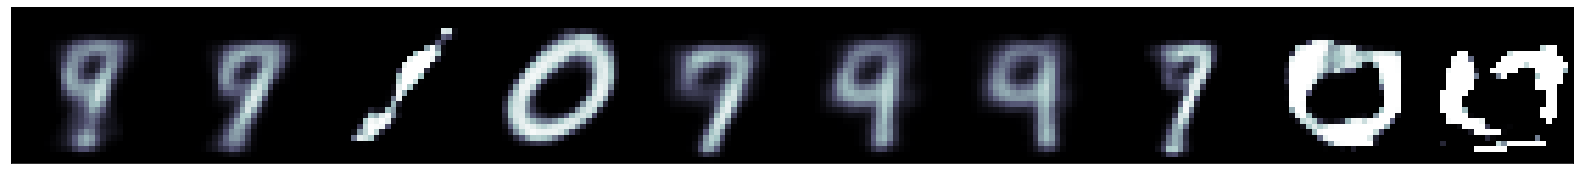

In [10]:
# random points

encoded_mean = np.mean(encoded, axis=0)
encoded_cov = np.cov(encoded.numpy().T)

random_points = np.random.multivariate_normal(encoded_mean, encoded_cov, size=10)
print(np.shape(random_points))
print(random_points)

decoded_random = model.decoder(random_points)

plot_mnist_comparison((decoded_random,), figsize=(28, 5))

(10000, 2)
(10, 2)
tf.Tensor([ 7  2  1 ... 11 11 11], shape=(10010,), dtype=uint8)


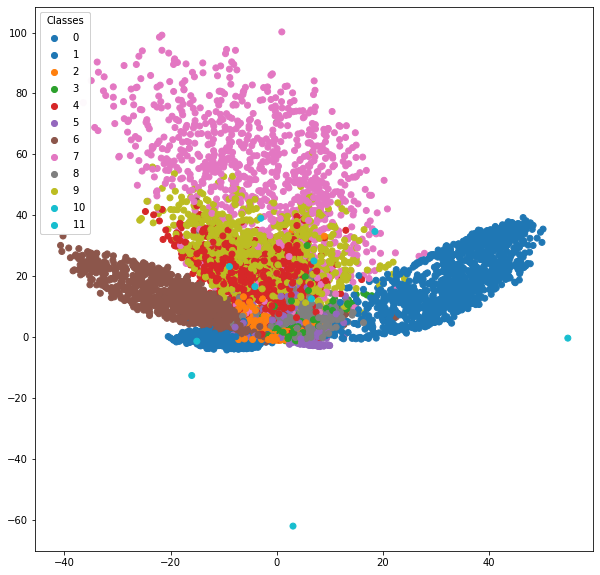

In [11]:
# plot test set and randomly sampled
print(encoded.shape)
print(random_points.shape)

encoded_and_random = tf.concat([encoded, random_points], 0)

random_labels = 11*np.ones(len(random_points))
encoded_and_random_labels = tf.concat([y_test, random_labels], 0)
print(encoded_and_random_labels)

plot_2d_scatter(encoded_and_random.numpy(), encoded_and_random_labels.numpy())

In [26]:
images = model(x_test)
%matplotlib
from visual.sample_scatter_gui import SampleScatterGUI

print(images.shape)
print(y_test.shape)


gui = SampleScatterGUI(encoded.numpy(), y_test, images[:,:,:,0])

plt.show()

Using matplotlib backend: agg
(10000, 28, 28, 1)
(10000,)
